In [ ]:
import numpy as np
import keras

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


In [3]:
import warnings

warnings.filterwarnings('ignore')

## Create the Convolutional Neural Network

In [4]:
model=Sequential()

In [5]:
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(64,64,3)))


In [6]:
model.add(MaxPooling2D(pool_size=2))

In [7]:
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',))
model.add(MaxPooling2D(pool_size=2))


In [8]:
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))


In [9]:
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))



#### Add a flatten layer

In [10]:
model.add(Flatten())

### Summary of the CNN

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 32)         

## Create an Artificial Neural Network on top of the CNN

In [12]:
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))

In [13]:
model.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))

In [14]:
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

### Summary of the overall Network (CNN+ANN)

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 32)         

# Image Augmentation

In [16]:
from keras.preprocessing.image import ImageDataGenerator

In [17]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [18]:
test_datagen = ImageDataGenerator(rescale=1./255)


### Set the Directory

#### "YOUR FILE PATH" is the local path of your machine where you have set up your folders for training and test sets.

In [19]:
train_set = train_datagen.flow_from_directory (
    'YOUR FILE PATH/training_set',\
    target_size=(64, 64),\
    batch_size=32,\
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [20]:
test_set = test_datagen.flow_from_directory(
    'YOUR FILE PATH/test_set',\
        target_size=(64, 64),\
        batch_size=32,\
        class_mode='binary')

Found 1000 images belonging to 2 classes.


## Fit the Model



### steps_per_epoch = Total Number of images in the training set
### validation_steps = Total number of Images in the test set

In [21]:
model.fit_generator(
        train_set,
        steps_per_epoch=2000,
        epochs=10,
        validation_data=test_set,
        validation_steps=1000)

Epoch 1/10
2000/2000 [==============================] - 317s 159ms/step - loss: 0.6932 - accuracy: 0.4926 - val_loss: 0.6936 - val_accuracy: 0.4999
Epoch 2/10
2000/2000 [==============================] - 336s 168ms/step - loss: 0.6932 - accuracy: 0.4902 - val_loss: 0.6931 - val_accuracy: 0.5003
Epoch 3/10
2000/2000 [==============================] - 301s 151ms/step - loss: 0.6932 - accuracy: 0.4912 - val_loss: 0.6932 - val_accuracy: 0.4997
Epoch 4/10
2000/2000 [==============================] - 345s 172ms/step - loss: 0.6932 - accuracy: 0.4914 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 5/10
2000/2000 [==============================] - 346s 173ms/step - loss: 0.6932 - accuracy: 0.4921 - val_loss: 0.6932 - val_accuracy: 0.5001
Epoch 6/10
2000/2000 [==============================] - 364s 182ms/step - loss: 0.6932 - accuracy: 0.4920 - val_loss: 0.6928 - val_accuracy: 0.5001
Epoch 7/10
2000/2000 [==============================] - 311s 156ms/step - loss: 0.6932 - accuracy: 0.4912 - val_

## Predicting a New Image

In [22]:
import numpy as np


In [23]:
from keras.preprocessing import image

#### Target size is 64x64 as out CNN inputs the image size as 64x64

In [38]:
new_image=image.load_img('test_image.jpg',target_size=(64,64))

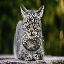

In [39]:
new_image

### Change the image to  numpy array

In [40]:
new_image=image.img_to_array(new_image)

In [41]:
new_image.ndim

3

In [42]:
type(new_image)

numpy.ndarray

### The input needs to be in 4 dimesnion. 4th Dim represents the batch size so add one more dimesion using the expand_dims function.

In [43]:
new_image=np.expand_dims(new_image,axis=0)

In [44]:
new_image.ndim

4

#### Predict the image and store it in a variable

In [45]:
result=model.predict(new_image)

In [46]:
result

array([[0.49976468]], dtype=float32)

In [47]:
train_set.class_indices

{'cats': 0, 'dogs': 1}

In [48]:
result.ndim

2

In [49]:
result[0][0]

0.49976468

In [50]:
result=model.predict(new_image)
if result[0][0]==1:
    predict=print('This is a Dog')
else:
    predict=print('This is a Cat')
    
    


This is a Cat
